In [2]:
# Utility
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sn

#Scikit Learn
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
path = r"C:\Users\sbsro\Documents\ML_Projects\titanic"

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
#df.loc can access group of rows and colomuns by label
survived = train.loc[train.Survived == 1]
nsurvived = train.loc[train.Survived == 0]

[Text(0.5, 1.0, 'Survivor Demographics')]

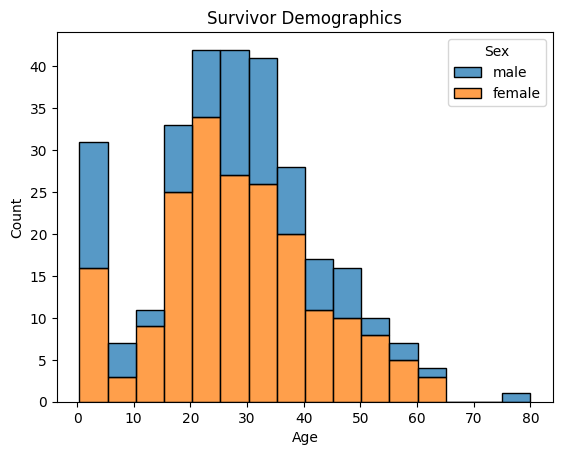

In [6]:
sn.histplot(data = survived, x = "Age", hue = "Sex",hue_order = ["male", "female"], multiple = "stack").set(title = "Survivor Demographics")

[Text(0.5, 1.0, 'Demographics of Deceased')]

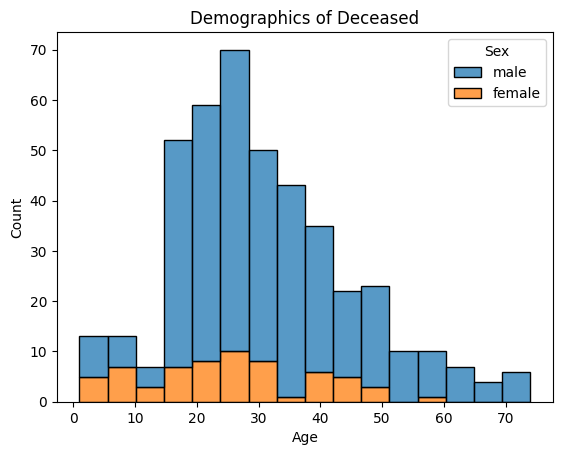

In [8]:
sn.histplot(data = nsurvived, x = "Age", hue = "Sex", hue_order = ["male", "female"], multiple = "stack").set(title = "Demographics of Deceased")

[Text(0.5, 1.0, 'Fare vs Survived')]

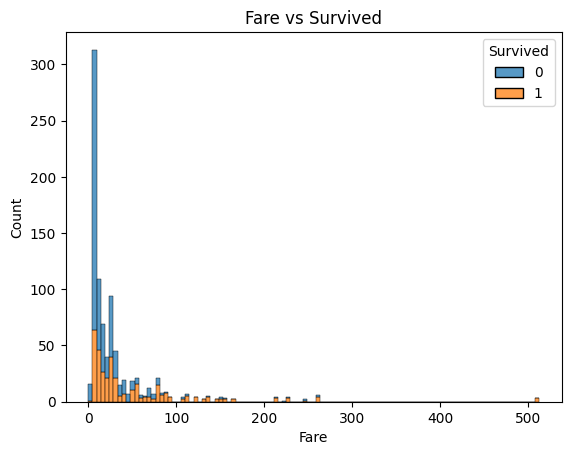

In [9]:
sn.histplot(data = train, x = "Fare", hue = "Survived", multiple = "stack").set(title = "Fare vs Survived")

[Text(0.5, 1.0, 'How does ticket class affect survivability?')]

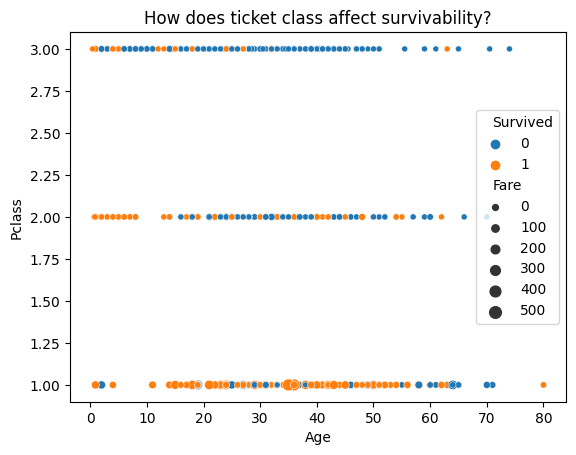

In [11]:
sn.scatterplot(data = train, x = "Age", y = "Pclass", hue = "Survived", size = "Fare").set(title = "How does ticket class affect survivability?")

### Brief Analysis

Based on the plots presented, it's clear that gender had a major impact on whether a person survived the Titanic. Most of the survivors were females, while most of the deaths were males. The class level of the passengers also played a significant role. First-class passengers had a higher survival rate compared to the other two classes. Additionally, a good number of younger individuals from the second class survived. On the other hand, not many people from the third class made it out alive.

### Feature Engineering

In [124]:
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0])

In [125]:
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0])

In [126]:
train['Relatives'] = train.Parch + train.SibSp

In [127]:
test['Relatives'] = test.Parch + test.SibSp

In [128]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [129]:
ss_scaler = StandardScaler()
train_ss = pd.DataFrame(data = train)

In [130]:
test_ss = pd.DataFrame(data = test)

In [131]:
test_ss[["Parch", "SibSp", "Relatives", "Age", "Fare"]] = ss_scaler.fit_transform(test_ss[["Parch", "SibSp", "Relatives", "Age", "Fare"]])

In [132]:
train_ss[["Parch", "SibSp", "Relatives", "Age", "Fare"]] = ss_scaler.fit_transform(train_ss[["Parch", "SibSp", "Relatives", "Age", "Fare"]])

In [98]:
train_ss.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,0.432793,-0.473674,A/5 21171,-0.502445,NaN,S,Mr,0.059160
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,0.432793,-0.473674,PC 17599,0.786845,C85,C,Mrs,0.059160
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,NaN,S,Miss,-0.560975
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,0.432793,-0.473674,113803,0.420730,C123,S,Mrs,0.059160
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,-0.474545,-0.473674,373450,-0.486337,NaN,S,Mr,-0.560975


In [133]:
train_ss = pd.get_dummies(train_ss, columns = ["Sex", "Embarked", "name_title", "Pclass"])

In [134]:
test_ss = pd.get_dummies(test_ss, columns = ["Sex", "Embarked", "name_title", "Pclass"])

In [101]:
train_ss.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Relatives,...,name_title_ Mme,name_title_ Mr,name_title_ Mrs,name_title_ Ms,name_title_ Rev,name_title_ Sir,name_title_ the Countess,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",-0.530377,0.432793,-0.473674,A/5 21171,-0.502445,NaN,0.059160,...,False,True,False,False,False,False,False,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.571831,0.432793,-0.473674,PC 17599,0.786845,C85,0.059160,...,False,False,True,False,False,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",-0.254825,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,NaN,-0.560975,...,False,False,False,False,False,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.365167,0.432793,-0.473674,113803,0.420730,C123,0.059160,...,False,False,True,False,False,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",0.365167,-0.474545,-0.473674,373450,-0.486337,NaN,-0.560975,...,False,True,False,False,False,False,False,False,False,True


In [102]:
train_ss.isna().sum()

PassengerId                   0
Survived                      0
Name                          0
Age                         177
SibSp                         0
Parch                         0
Ticket                        0
Fare                          0
Cabin                       687
Relatives                     0
Sex_female                    0
Sex_male                      0
Embarked_C                    0
Embarked_Q                    0
Embarked_S                    0
name_title_ Capt              0
name_title_ Col               0
name_title_ Don               0
name_title_ Dr                0
name_title_ Jonkheer          0
name_title_ Lady              0
name_title_ Major             0
name_title_ Master            0
name_title_ Miss              0
name_title_ Mlle              0
name_title_ Mme               0
name_title_ Mr                0
name_title_ Mrs               0
name_title_ Ms                0
name_title_ Rev               0
name_title_ Sir               0
name_tit

In [103]:
class Preprocessing(): 
    def __init__(self):
        pass
    
    def Encoder(self, data):
        ordinal_encoder = OrdinalEncoder()
        cl = ["Sex","name_title","Embarked"]
        cl_cat = data[cl]
        cl_encoded = ordinal_encoder.fit_transform(cl_cat)
        data[cl] = cl_encoded
        return data
    
    def Drop(self,data):
        data.drop(columns = ["Name", "PassengerId", "Ticket", "Cabin"], inplace = True)
        return data
    
    def fit_transform(self,data):
        #self.Mean(data)
        #self.Encoder(data)
        return self.Drop(data)

In [135]:
preprocessor = Preprocessing()

In [136]:
train_ss = preprocessor.fit_transform(train_ss)

In [137]:
train_ss

,Survived,Age,SibSp,Parch,Fare,Relatives,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,name_title_ Mme,name_title_ Mr,name_title_ Mrs,name_title_ Ms,name_title_ Rev,name_title_ Sir,name_title_ the Countess,Pclass_1,Pclass_2,Pclass_3
0,0,-0.530377,0.432793,-0.473674,-0.502445,0.059160,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,1,0.571831,0.432793,-0.473674,0.786845,0.059160,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
2,1,-0.254825,-0.474545,-0.473674,-0.488854,-0.560975,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,0.365167,0.432793,-0.473674,0.420730,0.059160,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0.365167,-0.474545,-0.473674,-0.486337,-0.560975,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.185937,-0.474545,-0.473674,-0.386671,-0.560975,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
887,1,-0.737041,-0.474545,-0.473674,-0.044381,-0.560975,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
888,0,NaN,0.432793,2.008933,-0.176263,1.299429,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
889,1,-0.254825,-0.474545,-0.473674,-0.044381,-0.560975,False,True,True,False,...,False,True,False,False,False,False,False,True,False,False


In [138]:
test_ss = preprocessor.fit_transform(test_ss)

In [108]:
test_ss.isna().sum()

Age                   86
SibSp                  0
Parch                  0
Fare                   1
Relatives              0
Sex_female             0
Sex_male               0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
name_title_ Col        0
name_title_ Dona       0
name_title_ Dr         0
name_title_ Master     0
name_title_ Miss       0
name_title_ Mr         0
name_title_ Mrs        0
name_title_ Ms         0
name_title_ Rev        0
Pclass_1               0
Pclass_2               0
Pclass_3               0
dtype: int64

In [139]:
train_ss, test_ss = train_ss.align(test_ss, join = 'outer', axis = 1, fill_value=0)

In [140]:
test_ss.isna().sum()

Age                         86
Embarked_C                   0
Embarked_Q                   0
Embarked_S                   0
Fare                         1
Parch                        0
Pclass_1                     0
Pclass_2                     0
Pclass_3                     0
Relatives                    0
Sex_female                   0
Sex_male                     0
SibSp                        0
Survived                     0
name_title_ Capt             0
name_title_ Col              0
name_title_ Don              0
name_title_ Dona             0
name_title_ Dr               0
name_title_ Jonkheer         0
name_title_ Lady             0
name_title_ Major            0
name_title_ Master           0
name_title_ Miss             0
name_title_ Mlle             0
name_title_ Mme              0
name_title_ Mr               0
name_title_ Mrs              0
name_title_ Ms               0
name_title_ Rev              0
name_title_ Sir              0
name_title_ the Countess     0
dtype: i

In [141]:
train_ss.isna().sum()

Age                         177
Embarked_C                    0
Embarked_Q                    0
Embarked_S                    0
Fare                          0
Parch                         0
Pclass_1                      0
Pclass_2                      0
Pclass_3                      0
Relatives                     0
Sex_female                    0
Sex_male                      0
SibSp                         0
Survived                      0
name_title_ Capt              0
name_title_ Col               0
name_title_ Don               0
name_title_ Dona              0
name_title_ Dr                0
name_title_ Jonkheer          0
name_title_ Lady              0
name_title_ Major             0
name_title_ Master            0
name_title_ Miss              0
name_title_ Mlle              0
name_title_ Mme               0
name_title_ Mr                0
name_title_ Mrs               0
name_title_ Ms                0
name_title_ Rev               0
name_title_ Sir               0
name_tit

In [147]:
train_ss.Age.fillna(train_ss["Age"].mean(),inplace=True)

In [143]:
test_ss.Age.fillna(test_ss["Age"].mean(),inplace=True)
test_ss.Fare.fillna(test_ss["Fare"].mean(),inplace=True)

### Model Training

In [353]:
X_train = train_ss.drop(columns = "Survived")

In [354]:
y_train = train_ss.Survived.copy()

In [230]:
X_test = test_ss.drop(columns = "Survived")

In [355]:
RfModel = RandomForestClassifier(max_depth= 9, n_estimators= 200, max_features= None, min_samples_leaf=3, min_samples_split=2)
RfModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=None, min_samples_leaf=3,
                       n_estimators=200)

In [356]:
scores = cross_val_score(RfModel, X_train, y_train, cv = 15)

In [357]:
scores

array([0.75, 0.65, 0.9 , 0.95, 0.7 , 0.7 , 0.7 , 0.9 , 0.75, 0.85, 0.75,
       0.75, 0.75, 0.75, 0.7 ])

In [290]:
scores.mean()

0.8440324594257179

In [270]:
params = {'max_depth' : [4,5,7,9],
         'n_estimators' : [100, 200, 300, 500],
         'max_features': [None],
         'min_samples_leaf': [1, 2, 3],
         'min_samples_split' : [2,3,4]}

In [271]:
grid_search = GridSearchCV(estimator = RfModel, param_grid = params, cv = 3, n_jobs = 1, verbose = 2)

In [272]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tota

[CV] END max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=4, max_features=None, min_sam

[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.4s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_sam

[CV] END max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=None, min_sam

[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.4s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.4s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.4s
[CV] END max_depth=7, max_features=None, min_sam

[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.8s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=3, n_estimators=500; total time=   0.8s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=9, max_features=None, min_sam

[CV] END max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=300; total time=   0.4s
[CV] END max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   0.7s
[CV] END max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=9, max_features=None, min_sam

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=9, max_features=None,
                                              min_samples_leaf=3,
                                              n_estimators=200),
             n_jobs=1,
             param_grid={'max_depth': [4, 5, 7, 9], 'max_features': [None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [273]:
grid_search.best_params_

{'max_depth': 9,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
BestModel = grid_search.best_estimator_

In [283]:
RfModel_pred = BestModel.predict(X_test)

### Output Best Predictions

In [284]:
pass_id = pd.read_csv("test.csv")["PassengerId"]

In [285]:
output = pd.DataFrame({'PassengerId': pass_id , "Survived" : RfModel_pred})

In [287]:
output.to_csv('predictions_titanic_DecisionTreeClass(1).csv', index = False)

In [286]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Testing Other Models

In [358]:
clf = svm.SVC(random_state = 42, kernel = 'poly', degree = 3, coef0= 10,gamma = 'auto')
clf.fit(X_train, y_train)

SVC(coef0=10, gamma='auto', kernel='poly', random_state=42)

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv = 15)

In [ ]:
scores